# Template Matching

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [35]:
img = cv2.imread('ironman.jpg')
img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB )

tgt_img = img[240:290 , 300:350] 

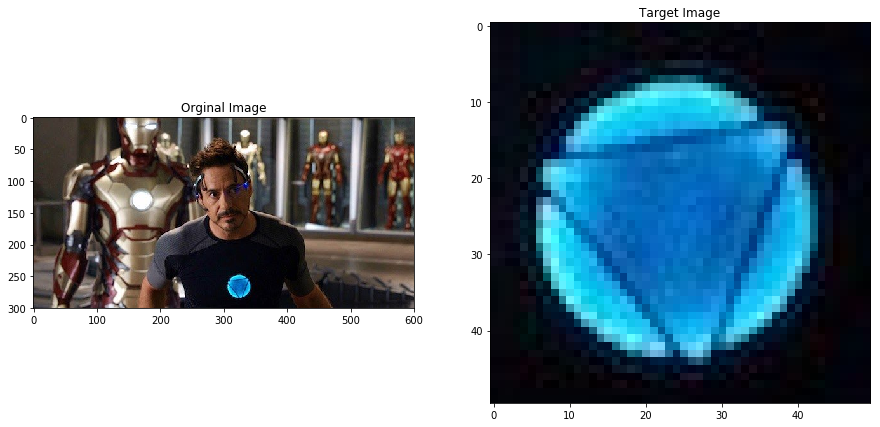

In [36]:
plt.figure(figsize = (15 , 8 ))

plt.subplot(1,2,1)
plt.title('Orginal Image')
plt.imshow( img  , cmap = 'gray' )

plt.subplot(1,2,2)
plt.title('Target Image' )
plt.imshow( tgt_img  , cmap = 'gray')

plt.show()


In [37]:
height , width , _ =  tgt_img.shape

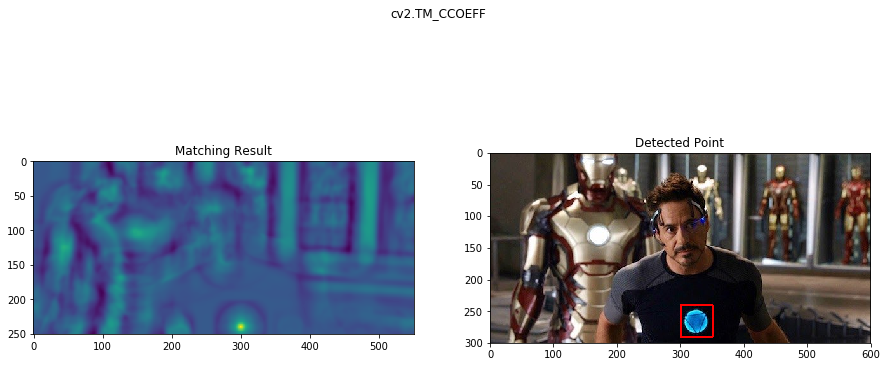

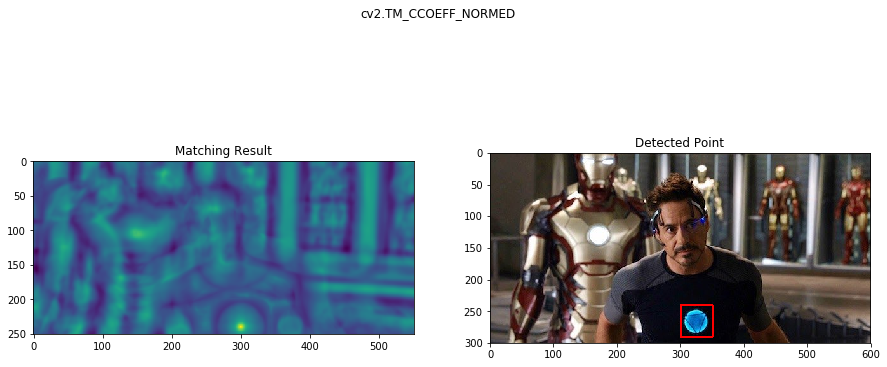

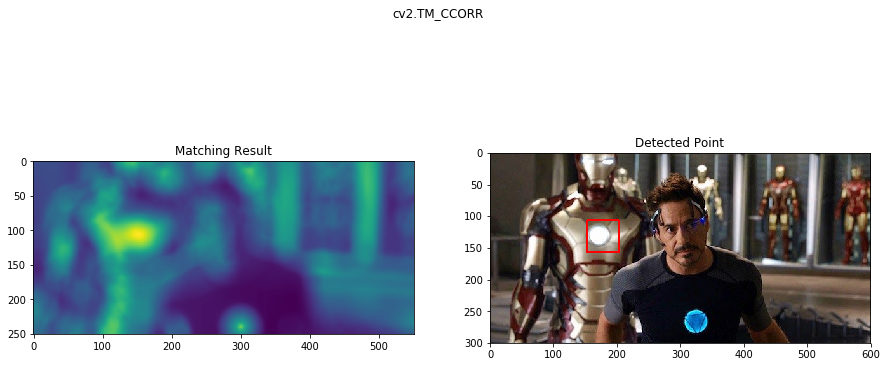

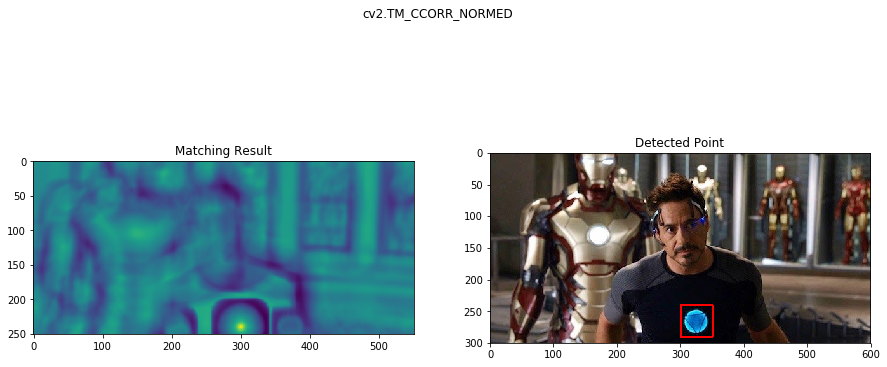

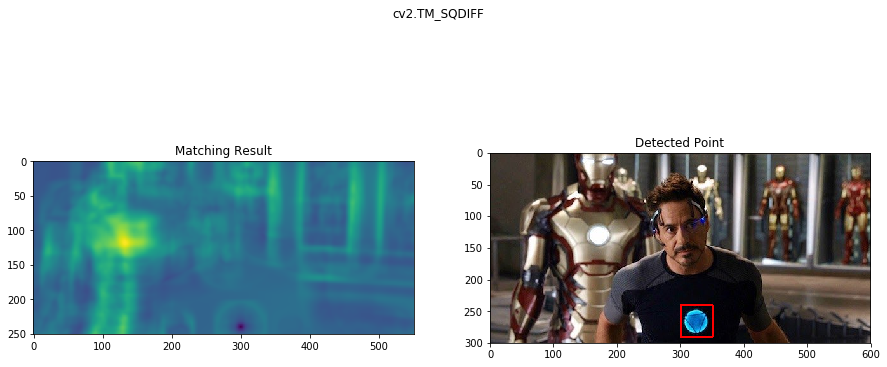

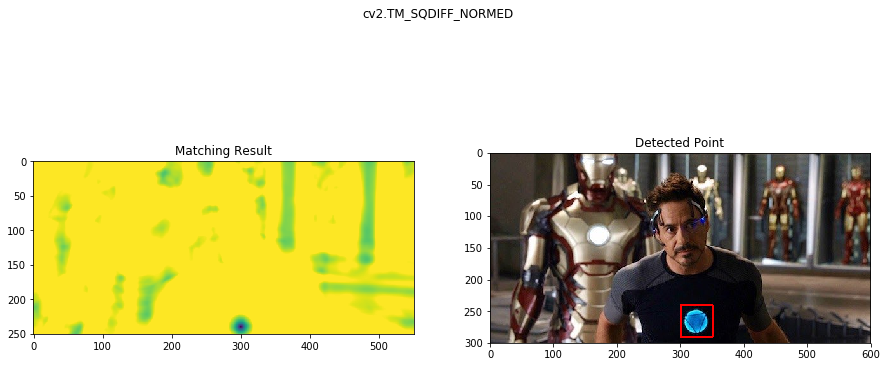

In [17]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods :
    
    plt.figure(figsize = (15 , 7 ))
    
    temp_img = img.copy()
    method = eval(m)
    
    res = cv2.matchTemplate(temp_img,tgt_img,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + width , top_left[1] + height)

    cv2.rectangle(temp_img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Matching Result')
    
    plt.subplot(122)
    plt.imshow(temp_img,cmap = 'gray')
    plt.title('Detected Point')
    
    plt.suptitle(m)

    plt.show()


# Multiple Detection , use Threshold to control the limit

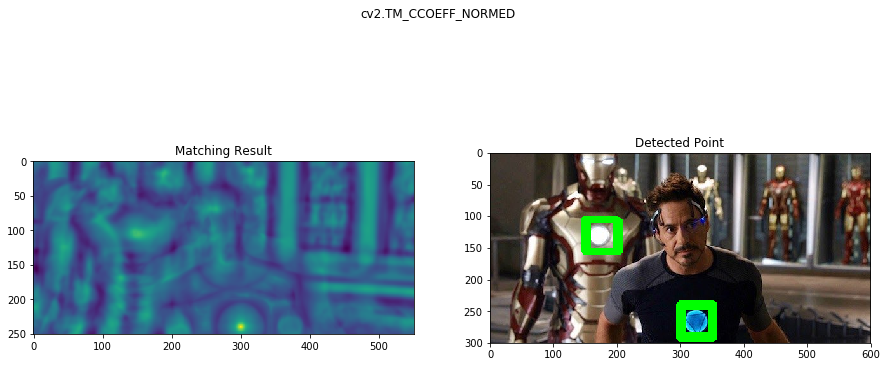

In [61]:
methods = [ 'cv2.TM_CCOEFF_NORMED' ]
            

for m in methods:

    plt.figure(figsize = (15 , 7 ))
    
    temp_img = img.copy()
    method = eval(m)
    
    res = cv2.matchTemplate(temp_img,tgt_img,method)
    loc = np.where( res > 0.5 )
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(temp_img, pt, (pt[0] + width , pt[1] + height ), (0,255,0), 2)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Matching Result')
    
    plt.subplot(122)
    plt.imshow(temp_img,cmap = 'gray')
    plt.title('Detected Point')
    
    plt.suptitle(m)

    plt.show()
